# Credit_Risk_Model
'Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of        medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

These files contain complete loan data for all loans issued including the current loan status (Current, Charged-off,Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, and collections among others. The file is a matrix of about 39 thousand observations and 111 variables. A data dictionary is provided in a separate file.'


The information above is from the **Lenders Club homepage** on Kaggle which can be viewed in its entirety [here](https://www.kaggle.com/imsparsh/lending-club-loan-dataset-2007-2011)

## Goal:
 Use  machine learning to create a model that predicts whether individuals will default on loans or not.

## Main Steps Taken:
Loading data

Cleaning data

Splitting data

Feature Selection

Getting the WOE and Information_Value

Training and testing data using Logistic Regression


## Main Libraries used
Pandas

Numpy

Matplotlib

Seaborn

Sklearn

Scipy.stats

Xverse

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
from xverse.transformer import WOE
from xverse.graph import BarCharts
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data
loan_df=pd.read_csv('loan.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
loan_df.sort_index(axis=1, inplace=True)
loan_df.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
0,0,NaN,AZ,NaN,24000.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,Borrower added on 12/22/11 > I need to upgra...,27.65,NaN,Jan-85,10+ years,NaN,5000,4975.0,B,RENT,1077501,NaN,f,NaN,NaN,1,162.87,10.65%,Dec-11,May-16,171.62,Jan-15,5000,Fully Paid,NaN,1296599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,credit_card,n,0.00,13648,83.70%,B2,0.0,36 months,Computer,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,5863.155187,5833.84,863.16,0.00,5000.00,NaN,https://lendingclub.com/browse/loanDetail.acti...,Verified,NaN,860xx
1,0,NaN,GA,NaN,30000.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,1.11,0.0,0,0,Borrower added on 12/22/11 > I plan to use t...,1.00,NaN,Apr-99,< 1 year,Ryder,2500,2500.0,C,RENT,1077430,NaN,f,NaN,NaN,5,59.83,15.27%,Dec-11,Sep-13,119.66,Apr-13,2500,Charged Off,NaN,1314167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,car,n,117.08,1687,9.40%,C4,0.0,60 months,bike,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,1008.710000,1008.71,435.17,0.00,456.46,NaN,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,NaN,309xx
2,0,NaN,IL,NaN,12252.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,NaN,8.72,NaN,Nov-01,10+ years,NaN,2400,2400.0,C,RENT,1077175,NaN,f,NaN,NaN,2,84.33,15.96%,Dec-11,May-16,649.91,Jun-14,2400,Fully Paid,NaN,1313524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,small_business,n,0.00,2956,98.50%,C5,0.0,36 months,real estate business,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,3005.666844,3005.67,605.67,0.00,2400.00,NaN,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,NaN,606xx
3,0,NaN,CA,NaN,49200.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,Borrower added on 12/21/11 > to pay for prop...,20.00,NaN,Feb-96,10+ years,AIR RESOURCES BOARD,10000,10000.0,C,RENT,1076863,NaN,f,NaN,NaN,1,339.31,13.49%,Dec-11,Apr-16,357.48,Jan-15,10000,Fully Paid,NaN,1277178,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,other,n,0.00,5598,21%,C1,0.0,36 months,personel,NaN,NaN,NaN,37,NaN,NaN,NaN,NaN,NaN,12231.890000,12231.89,2214.92,16.97,10000.00

In [4]:
loan_df.shape

(39717, 111)

In [5]:
loan_df.info(verbose=bool)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    acc_now_delinq                  int64  
 1    acc_open_past_24mths            float64
 2    addr_state                      object 
 3    all_util                        float64
 4    annual_inc                      float64
 5    annual_inc_joint                float64
 6    application_type                object 
 7    avg_cur_bal                     float64
 8    bc_open_to_buy                  float64
 9    bc_util                         float64
 10   chargeoff_within_12_mths        float64
 11   collection_recovery_fee         float64
 12   collections_12_mths_ex_med      float64
 13   delinq_2yrs                     int64  
 14   delinq_amnt                     int64  
 15   desc                            object 
 16   dti                             float64
 17   dti_joint 

In [6]:
#Getting the characteristics of the numerical features
#Here we see a lot of missing values
loan_df.describe()

,acc_now_delinq,acc_open_past_24mths,all_util,annual_inc,annual_inc_joint,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,dti_joint,funded_amnt,funded_amnt_inv,id,il_util,inq_fi,inq_last_12m,inq_last_6mths,installment,last_pymnt_amnt,loan_amnt,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,recoveries,revol_bal,tax_liens,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,verification_status_joint
count,39717.0,0.0,0.0,3.971700e+04,0.0,0.0,0.0,0.0,39661.0,39717.000000,39661.0,39717.000000,39717.0,39717.000000,0.0,39717.000000,39717.000000,3.971700e+04,0.0,0.0,0.0,39717.000000,39717.000000,39717.000000,39717.000000,0.0,3.971700e+04,0.0,0.0,0.0,0.0,0.0,14035.000000,0.0,2786.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39717.000000,0.0,0.0,0.0,0.0,0.0,0.0,39717.000000,39717.000000,0.0,0.0,39717.0,39717.000000,39020.000000,39717.000000,39717.000000,39678.0,0.0,0.0,0.0,39717.000000,0.0,0.0,0.0,0.0,0.0,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,0.0,0.0
mean,0.0,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,0.0,12.406112,0.0,0.146512,0.0,13.315130,NaN,10947.713196,10397.448868,6.831319e+05,NaN,NaN,NaN,0.869200,324.561922,2678.826162,11219.443815,NaN,8.504636e+05,NaN,NaN,NaN,NaN,NaN,35.900962,NaN,69.698134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.294408,NaN,NaN,NaN,NaN,NaN,NaN,51.227887,50.989768,NaN,NaN,1.0,0.055065,0.043260,95.221624,13382.528086,0.0,NaN,NaN,NaN,22.088828,NaN,NaN,NaN,NaN,NaN,12153.596544,11567.149118,2263.663172,1.363015,9793.348813,NaN,NaN
std,0.0,NaN,NaN,6.379377e+04,NaN,NaN,NaN,NaN,0.0,148.671593,0.0,0.491812,0.0,6.678594,NaN,7187.238670,7128.450439,2.106941e+05,NaN,NaN,NaN,1.070219,208.874874,4447.136012,7456.670694,NaN,2.656783e+05,NaN,NaN,NaN,NaN,NaN,22.020060,NaN,43.822529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.400282,NaN,NaN,NaN,NaN,NaN,NaN,375.172839,373.824457,NaN,NaN,0.0,0.237200,0.204324,688.744771,15885.016641,0.0,NaN,NaN,NaN,11.401709,NaN,NaN,NaN,NaN,NaN,9042.040766,8942.672613,2608.111964,7.289979,7065.522127,NaN,NaN
min,0.0,NaN,NaN,4.000000e+03,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,0.000000,0.0,0.000000,NaN,500.000000,0.000000,5.473400e+04,NaN,NaN,NaN,0.000000,15.690000,0.000000,500.000000,NaN,7.069900e+04,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.0,NaN,NaN,4.040400e+04,NaN,NaN,NaN,NaN,0.0,0.000000,0.0,0.000000,0.0,8.170000,NaN,5400.000000,5000.000000,5.162210e+05,NaN,NaN,NaN,0.000000,167.020000,218.680000,5500.000000,NaN,6.667800e+05,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.0,0.000000,0.000000,0.000000,3703.000000,0.0,NaN,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,5576.930000,5112.310

In [7]:
#Getting the characteristics of the categorical features
loan_df.describe(include=['O'])

,addr_state,application_type,desc,earliest_cr_line,emp_length,emp_title,grade,home_ownership,initial_list_status,int_rate,issue_d,last_credit_pull_d,last_pymnt_d,loan_status,next_pymnt_d,purpose,pymnt_plan,revol_util,sub_grade,term,title,url,verification_status,zip_code
count,39717,39717,26777,39717,38642,37258,39717,39717,39717,39717,39717,39715,39646,39717,1140,39717,39717,39667,39717,39717,39706,39717,39717,39717
unique,50,1,26527,526,11,28820,7,5,1,371,55,106,101,3,2,14,1,1089,35,2,19615,39717,3,823
top,CA,INDIVIDUAL,,Nov-98,10+ years,US Army,B,RENT,f,10.99%,Dec-11,May-16,May-16,Fully Paid,Jun-16,debt_consolidation,n,0%,B3,36 months,Debt Consolidation,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,100xx
freq,7099,39717,210,370,8879,134,12020,18899,39717,956,2260,10308,1256,32950,1125,18641,39717,977,2917,29096,2184,1,16921,597


### Data Cleaning

In [8]:
#Finding missing values per column
loan_df.isna().sum()

acc_now_delinq                        0
acc_open_past_24mths              39717
addr_state                            0
all_util                          39717
annual_inc                            0
annual_inc_joint                  39717
application_type                      0
avg_cur_bal                       39717
bc_open_to_buy                    39717
bc_util                           39717
chargeoff_within_12_mths             56
collection_recovery_fee               0
collections_12_mths_ex_med           56
delinq_2yrs                           0
delinq_amnt                           0
desc                              12940
dti                                   0
dti_joint                         39717
earliest_cr_line                      0
emp_length                         1075
emp_title                          2459
funded_amnt                           0
funded_amnt_inv                       0
grade                                 0
home_ownership                        0


In [9]:
def missing_values_table(df):
        
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
missing_values_table(loan_df)

Your selected dataframe has 111 columns.
There are 68 columns that have missing values.


,Missing Values,% of Total Values
acc_open_past_24mths,39717,100.0
num_accts_ever_120_pd,39717,100.0
all_util,39717,100.0
num_bc_sats,39717,100.0
num_bc_tl,39717,100.0
num_il_tl,39717,100.0
num_op_rev_tl,39717,100.0
num_rev_accts,39717,100.0
num_rev_tl_bal_gt_0,39717,100.0
num_sats,39717,100.0


In [10]:
# First we delete columns with over 50% missing values
missing_df = missing_values_table(loan_df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print(f'You have now removed {len(missing_columns)} columns that have over 50% missing entries')
loan_df = loan_df.drop(columns =list(missing_columns), axis=1)

Your selected dataframe has 111 columns.
There are 68 columns that have missing values.
You have now removed 57 columns that have over 50% missing entries


In [11]:
#Second, we remove variables that do not assist us in any way in finding whether a person will default or not

loan_df.drop(columns=['id','title','url','member_id','desc','zip_code','emp_title',],axis=1,inplace=True)

In [12]:
#Third, we remove any variables that are about the future.Eg, features that would only exist after a borrower has defaulted.
#These features don't assist in predicting actual defaults

loan_df.drop(columns=['recoveries','collection_recovery_fee','total_rec_prncp','total_rec_late_fee','total_rec_int'],axis=1,inplace=True)

In [13]:
#Fourth we delete subgrade as it is the same as grade
loan_df.drop(columns=['sub_grade'],axis=1,inplace=True)

In [14]:
#After further investigation from dictionary.xlsx we come to know the definitions of the column names and we realize that 
#some columns have wrong data type

In [15]:
#changing the columns within the time list to datetime
time=['last_credit_pull_d','issue_d','earliest_cr_line','last_pymnt_d']

for column in time:
    loan_df[column]=pd.to_datetime(loan_df[column], format='%b-%y')

In [16]:
#Changing columns datatype to float
loan_df['int_rate']=loan_df['int_rate'].str.replace('%','').astype(float)
loan_df['revol_util']=loan_df['revol_util'].str.replace('%','').astype(float)
loan_df['inq_last_6mths']=loan_df['inq_last_6mths'].astype(float)
loan_df['term']=loan_df['term'].str.replace('months','').astype(float)

In [17]:
#Changing emp_length to float
def employment_length(df,column):
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace('+', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = df[column].str.replace('<','')
    
    
employment_length(loan_df, 'emp_length')

loan_df['emp_length']=loan_df['emp_length'].astype(float)

In [18]:
#To see all the changes made
loan_df.info(verbose=bool)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   acc_now_delinq              39717 non-null  int64         
 1   addr_state                  39717 non-null  object        
 2   annual_inc                  39717 non-null  float64       
 3   application_type            39717 non-null  object        
 4   chargeoff_within_12_mths    39661 non-null  float64       
 5   collections_12_mths_ex_med  39661 non-null  float64       
 6   delinq_2yrs                 39717 non-null  int64         
 7   delinq_amnt                 39717 non-null  int64         
 8   dti                         39717 non-null  float64       
 9   earliest_cr_line            39717 non-null  datetime64[ns]
 10  emp_length                  38642 non-null  float64       
 11  funded_amnt                 39717 non-null  int64     

### Finding the dependent variable

In [19]:
#Identifying the dependent variable
#We see it's the loan status

loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [20]:
#Since we are dealing with a binary classification problem, we have a to make the target variable into 0 and 1
#1 is for  good borrower and 0 is  for bad borrower

loan_df['credit_default'] = np.where(loan_df.loc[:, 'loan_status'].isin(['Charged Off']), 0, 1)

### Splitting the dataset

In [21]:
#train_test_split the data before feature selection to avoid data leakage
#We stratify in order to ensure the distribution of good loans and bad loans in the test set
# is equal to the one before  splitting the dataset

loan_df.drop(columns=['loan_status'],inplace=True)
y=loan_df['credit_default']
X=loan_df.drop(columns=['credit_default'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)


In [22]:
#Creating new columns that take in the difference between now and the date columns
def time_difference(df,time):
    today_date = pd.to_datetime('2021-06-03')
    for column in time:
        df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
        df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
        df.drop(columns = [column], inplace = True)
        
time_difference(X_train, time)
time_difference(X_test, time)

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31773 entries, 4456 to 38247
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   acc_now_delinq                 31773 non-null  int64  
 1   addr_state                     31773 non-null  object 
 2   annual_inc                     31773 non-null  float64
 3   application_type               31773 non-null  object 
 4   chargeoff_within_12_mths       31725 non-null  float64
 5   collections_12_mths_ex_med     31725 non-null  float64
 6   delinq_2yrs                    31773 non-null  int64  
 7   delinq_amnt                    31773 non-null  int64  
 8   dti                            31773 non-null  float64
 9   emp_length                     30909 non-null  float64
 10  funded_amnt                    31773 non-null  int64  
 11  funded_amnt_inv                31773 non-null  float64
 12  grade                          31773 non-nu

## Feature selection using filtering methods

### 1.Numerical Features

In [24]:
numerical_features=X_train.select_dtypes('float64')
numerical_df=pd.DataFrame(data=numerical_features)
numerical_df.head()

,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,dti,emp_length,funded_amnt_inv,inq_last_6mths,installment,int_rate,last_pymnt_amnt,out_prncp,out_prncp_inv,pub_rec_bankruptcies,revol_util,tax_liens,term,total_pymnt,total_pymnt_inv,mths_since_last_credit_pull_d,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d
4456,115000.0,0.0,0.0,12.55,10.0,14400.0,1.0,483.05,12.69,976.38,0.0,0.0,0.0,18.8,0.0,36.0,17384.553990,17384.55,62.0,116.0,263.0,80.0
16513,46800.0,0.0,0.0,19.15,4.0,14000.0,0.0,454.18,10.37,557.95,0.0,0.0,0.0,29.9,0.0,36.0,15090.869440,15090.87,73.0,122.0,199.0,109.0
30996,43200.0,0.0,0.0,18.11,NaN,8950.0,1.0,310.19,14.59,323.83,0.0,0.0,0.0,89.4,0.0,36.0,11167.271300,11105.23,102.0,134.0,301.0,98.0
30383,55000.0,0.0,0.0,5.02,3.0,9000.0,1.0,327.36,10.99,6.32,0.0,0.0,0.0,30.8,0.0,36.0,10353.542870,9318.20,128.0,133.0,181.0,128.0
39417,39996.0,0.0,0.0,9.48,6.0,1025.0,3.0,133.55,12.36,137.60,0.0,0.0,NaN,28.4,0.0,36.0,4807.629375,1231.96,119.0,161.0,296.0,125.0


In [25]:
#using the ANOVA F Statistic to get the least correlated numerical variables to the target variable
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values
numerical_df.fillna(numerical_df.mean(), inplace = True)
F_statistic, p_values = f_classif(numerical_df, y_train)

ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': numerical_df.columns.values, 'F-Score': F_statistic, 'p_values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

,Numerical_Feature,F-Score,p_values
0,total_pymnt,1875.171909,0.000000e+00
1,total_pymnt_inv,1824.757944,0.000000e+00
2,last_pymnt_amnt,1544.290948,0.000000e+00
3,mths_since_last_pymnt_d,1315.345342,0.000000e+00
4,int_rate,1300.402865,0.000000e+00
5,term,701.805069,0.000000e+00
6,revol_util,295.185610,0.000000e+00
7,inq_last_6mths,168.681070,0.000000e+00
8,out_prncp,97.518818,0.000000e+00
9,out_prncp_inv,97.346456,0.000000e+00


In [26]:
best_num=ANOVA_F_table.iloc[:13,0].to_list()
best_num

['total_pymnt',
 'total_pymnt_inv',
 'last_pymnt_amnt',
 'mths_since_last_pymnt_d',
 'int_rate',
 'term',
 'revol_util',
 'inq_last_6mths',
 'out_prncp',
 'out_prncp_inv',
 'mths_since_last_credit_pull_d',
 'pub_rec_bankruptcies',
 'annual_inc']

<AxesSubplot:>

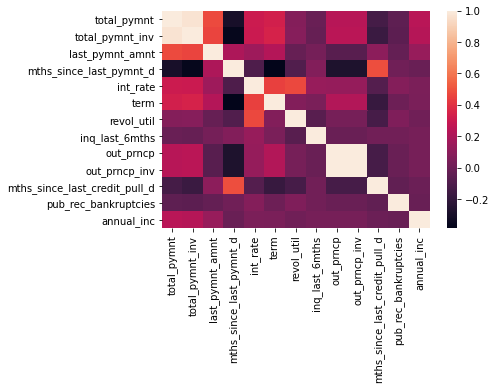

In [29]:
correlation=X_train[best_num].corr()
sns.heatmap(correlation)

In [30]:
#As seen above the variable groups['total_pymnt_inv' and 'total_pyment'] and ['out_prncp_inv' and 'out_prncp'] are highly correlated
#We drop one from each

X_train.drop(columns=['total_pymnt','out_prncp'],inplace=True)
X_test.drop(columns=['total_pymnt','out_prncp'],inplace=True)


### 2.Categorical Features

In [31]:
categorical_features=X_train.loc[:, X_train.dtypes == np.object]
categorical_df=pd.DataFrame(data=categorical_features)
categorical_df.head()

,addr_state,application_type,grade,home_ownership,initial_list_status,purpose,pymnt_plan,verification_status
4456,VA,INDIVIDUAL,B,MORTGAGE,f,home_improvement,n,Source Verified
16513,WA,INDIVIDUAL,B,RENT,f,debt_consolidation,n,Not Verified
30996,NY,INDIVIDUAL,D,RENT,f,debt_consolidation,n,Not Verified
30383,NY,INDIVIDUAL,B,RENT,f,wedding,n,Not Verified
39417,AZ,INDIVIDUAL,D,RENT,f,debt_consolidation,n,Not Verified


In [32]:
#Using chi square to get the least correlated categorical variables to the target variable
chi2_check = {}
for column in categorical_df:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, categorical_df[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

,Feature,p-value
0,grade,0.000000e+00
1,purpose,0.000000e+00
2,verification_status,0.000000e+00
3,addr_state,1.120000e-08
4,home_ownership,1.235000e-05
5,application_type,1.000000e+00
6,initial_list_status,1.000000e+00
7,pymnt_plan,1.000000e+00


In [33]:
best_cat=chi2_result.iloc[:5,0].to_list()
best_cat

['grade', 'purpose', 'verification_status', 'addr_state', 'home_ownership']

In [34]:
#Removing the least desireable categorical and numerical variables

def drop_features(df):
    
    for column in df.columns:
        if column not in best_num:
            if column not in best_cat:
                df.drop(columns=[column],axis=1, inplace=True)
            
    return df


drop_features(X_train)
drop_features(X_test).head()

,addr_state,annual_inc,grade,home_ownership,inq_last_6mths,int_rate,last_pymnt_amnt,out_prncp_inv,pub_rec_bankruptcies,purpose,revol_util,term,total_pymnt_inv,verification_status,mths_since_last_credit_pull_d,mths_since_last_pymnt_d
35040,NM,39600.00,B,MORTGAGE,0.0,12.53,1146.57,0.0,0.0,debt_consolidation,26.1,36.0,5956.51,Verified,62.0,110.0
25292,CA,65000.00,C,RENT,1.0,13.98,246.07,0.0,0.0,debt_consolidation,75.9,36.0,8675.65,Not Verified,100.0,100.0
27149,NY,24000.00,D,MORTGAGE,0.0,15.58,28.92,0.0,0.0,debt_consolidation,0.0,60.0,795.15,Not Verified,99.0,104.0
16039,NJ,64052.00,B,RENT,1.0,10.74,1238.52,0.0,0.0,debt_consolidation,15.9,36.0,5685.44,Not Verified,81.0,92.0
32385,MA,36416.84,D,RENT,1.0,14.96,242.53,0.0,0.0,other,73.8,36.0,3386.88,Not Verified,62.0,122.0


## WOE and Information_Value 

In [35]:
#Creating bins for the numerical variables
#Getting the Weight of Evidence for each bin and the Information value for each column
#Event refers to the number of good borrowers
#Non Event refers to the number of bad borrowers

clf = WOE(treat_missing='mode')
clf.fit(X_train, y_train)

clf.woe_df.head()

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,addr_state,AK,67,56,11,0.835821,0.164179,0.002053,0.002443,-0.173846,0.031593
1,addr_state,AL,337,296,41,0.878338,0.121662,0.010854,0.009107,0.175485,0.031593
2,addr_state,AR,193,174,19,0.901554,0.098446,0.006380,0.004220,0.413314,0.031593
3,addr_state,AZ,688,588,100,0.854651,0.145349,0.021561,0.022212,-0.029745,0.031593
4,addr_state,CA,5707,4804,903,0.841773,0.158227,0.176158,0.200578,-0.129820,0.031593


In [36]:
clf.woe_df.shape

(109, 11)

In [37]:
#We will need this bins later in X_test transformation
output_mono_bins=clf.mono_custom_binning
output_woe_bins = clf.woe_bins

In [38]:
#This shows the bins created for values within the numerical columns
output_mono_bins

{'annual_inc': array([4.00000000e+03, 4.67230000e+04, 7.20646667e+04, 6.00000000e+06]),
 'inq_last_6mths': array([0., 1., 8.]),
 'int_rate': array([ 5.42, 10.37, 13.49, 24.59]),
 'last_pymnt_amnt': array([    0.        ,   299.11      ,  1886.34666667, 36115.2       ]),
 'out_prncp_inv': array([0.00000e+00, 1.00000e+00, 6.30737e+03]),
 'pub_rec_bankruptcies': array([ 0.,  1.,  2., nan]),
 'revol_util': array([ 0. , 33.9, 64.7, 99.9]),
 'term': array([36., 60.]),
 'total_pymnt_inv': array([    0.        ,  6291.18666667, 13124.14666667, 58563.68      ]),
 'mths_since_last_credit_pull_d': array([ 61.,  63.,  88., 169.]),
 'mths_since_last_pymnt_d': array([ 61.,  89., 106., 161.])}

In [39]:
#This shows the WOE for every single bin created for the numerical columns as well as the categorical columns
output_woe_bins

{'addr_state': {'AK': -0.17384570609753786,
  'AL': 0.17548526358543615,
  'AR': 0.4133141960137721,
  'AZ': -0.02974536212378075,
  'CA': -0.1298204942514277,
  'CO': 0.22540312156457623,
  'CT': 0.2096716183680587,
  'DC': 0.8114378972635687,
  'DE': 0.33876403946195444,
  'FL': -0.2615541901213232,
  'GA': -0.05132152748077897,
  'HI': -0.13875438628626763,
  'IA': 0.0,
  'ID': -0.41500776291442587,
  'IL': 0.100805402362604,
  'IN': 0.0,
  'KS': 0.2880897484986877,
  'KY': -0.005166280206462451,
  'LA': 0.10429248784253693,
  'MA': 0.14889527703261674,
  'MD': -0.11462262620639141,
  'ME': 0.0,
  'MI': 0.01956542935180918,
  'MN': 0.12398873781826121,
  'MO': -0.19186421160021608,
  'MS': 0.14460802502099698,
  'MT': 0.36366159108368146,
  'NC': -0.06993836509600136,
  'NE': -2.206767232142481,
  'NH': -0.07853552629321292,
  'NJ': -0.04797936164733413,
  'NM': -0.07698393560179408,
  'NV': -0.5085338209252492,
  'NY': 0.07390463342084969,
  'OH': 0.12031533245195228,
  'OK': 0.030

In [40]:
#Getting the Information Value per column
clf.iv_df

,Variable_Name,Information_Value
6,last_pymnt_amnt,1.810996
14,total_pymnt_inv,0.583194
2,grade,0.319638
8,mths_since_last_pymnt_d,0.296871
5,int_rate,0.270478
7,mths_since_last_credit_pull_d,0.196368
13,term,0.159711
12,revol_util,0.070897
11,purpose,0.069780
1,annual_inc,0.035249


In [41]:
#As seen above the 'last_pymnt_amnt' has an information value that is way greater than 0.5.it can't be used in our model

X_train.drop(columns=['last_pymnt_amnt'], inplace=True)
X_test.drop(columns=['last_pymnt_amnt'], inplace=True)

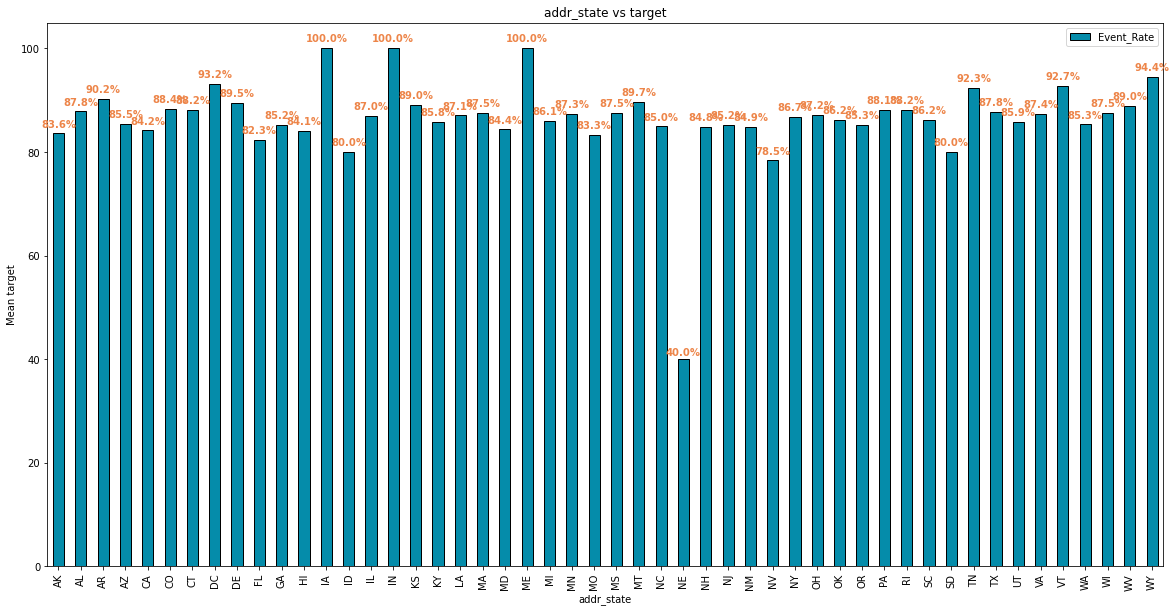

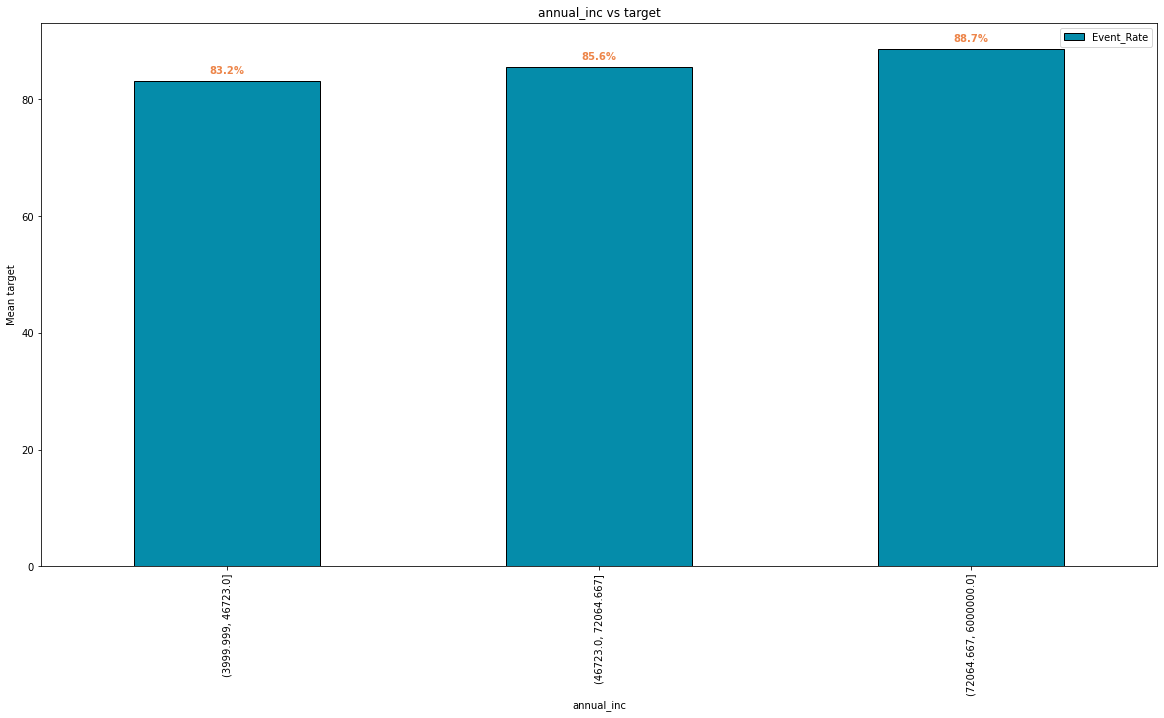

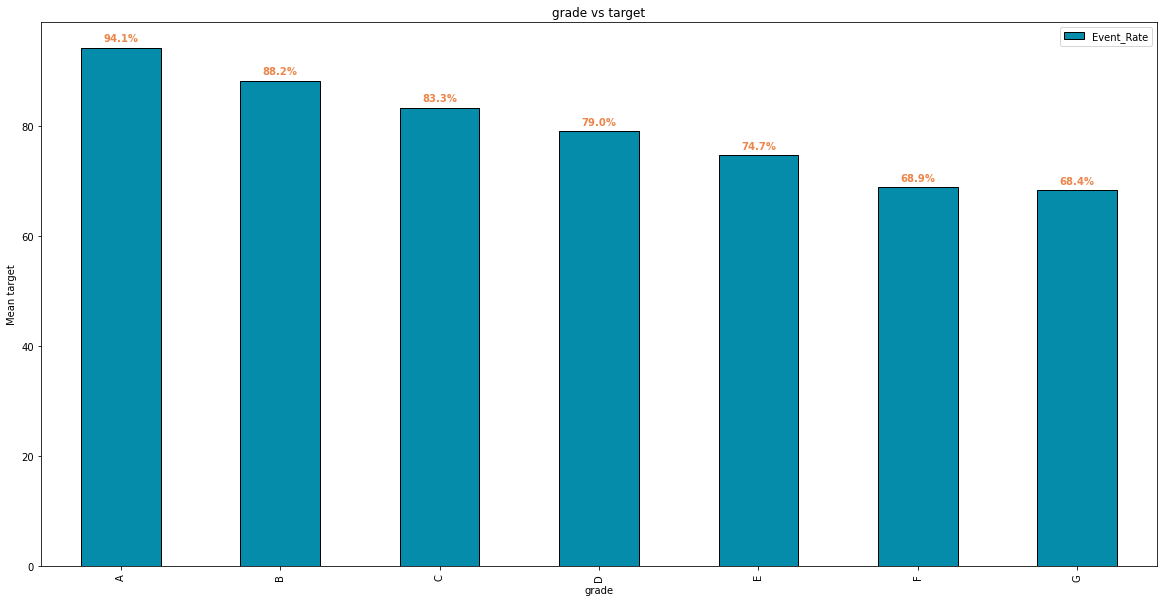

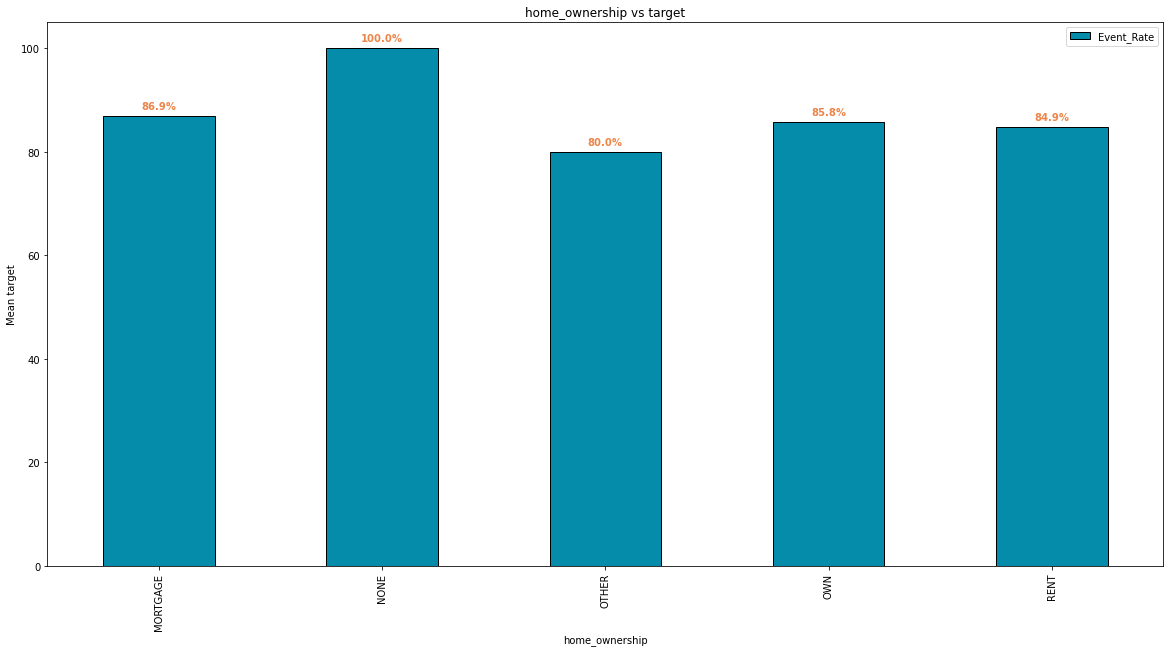

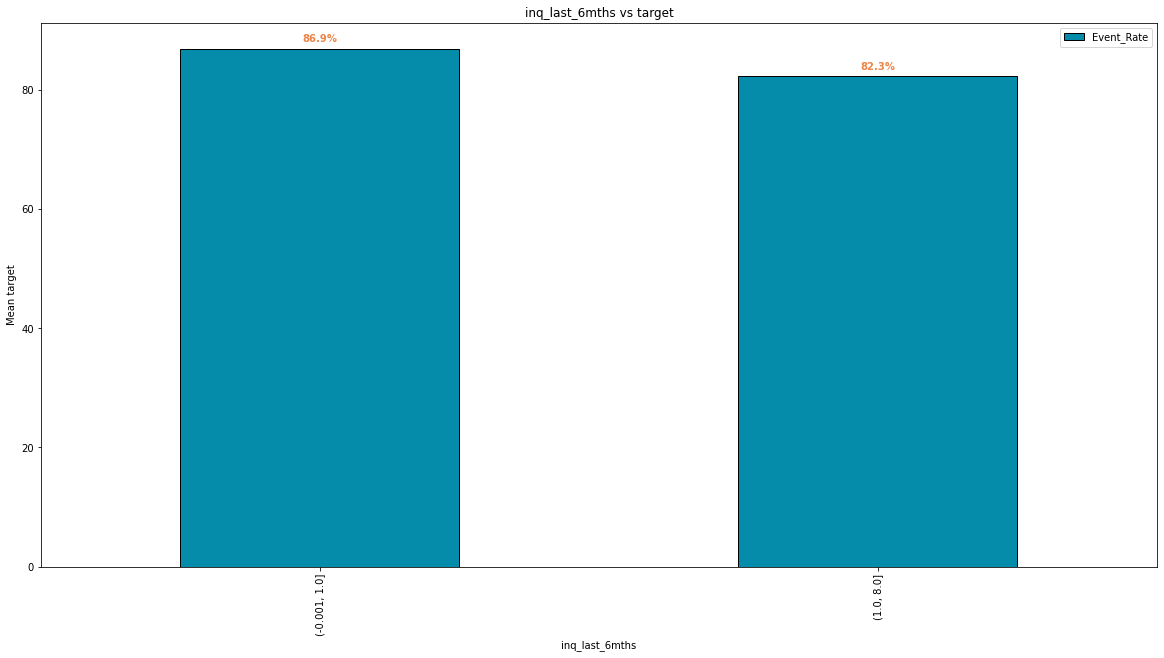

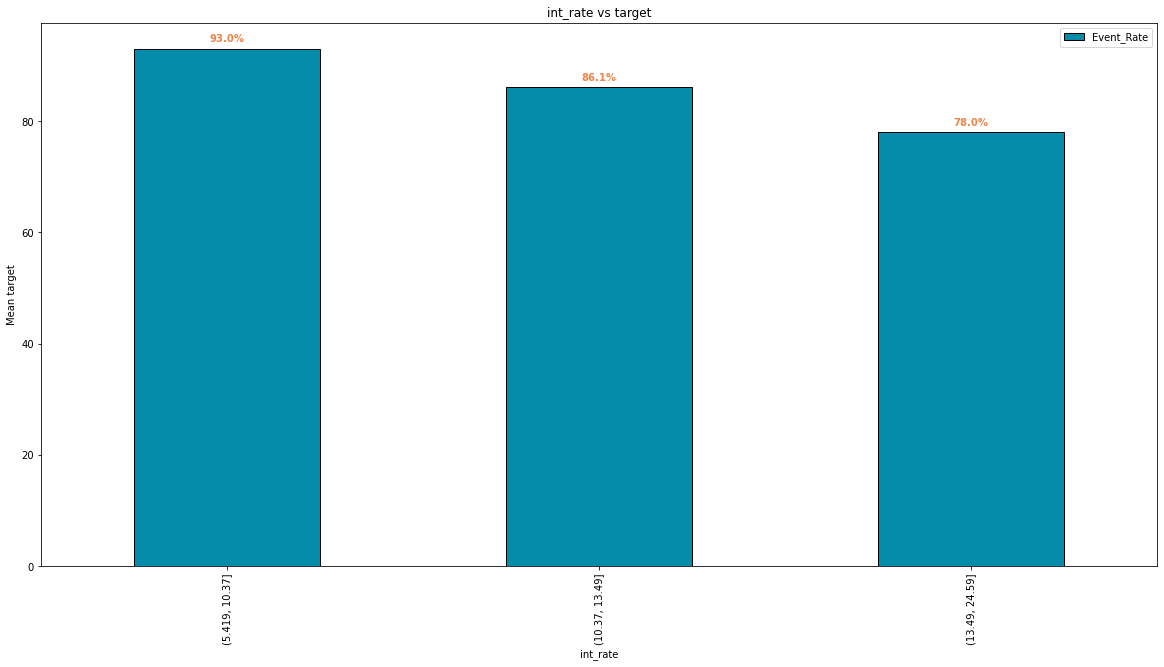

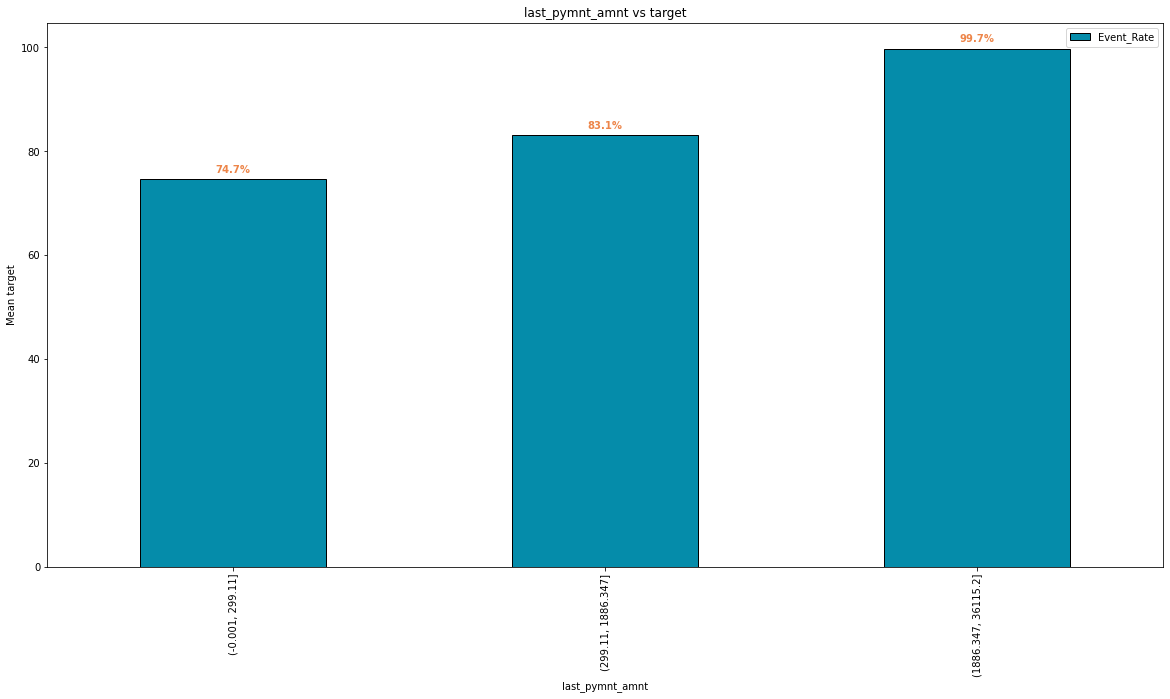

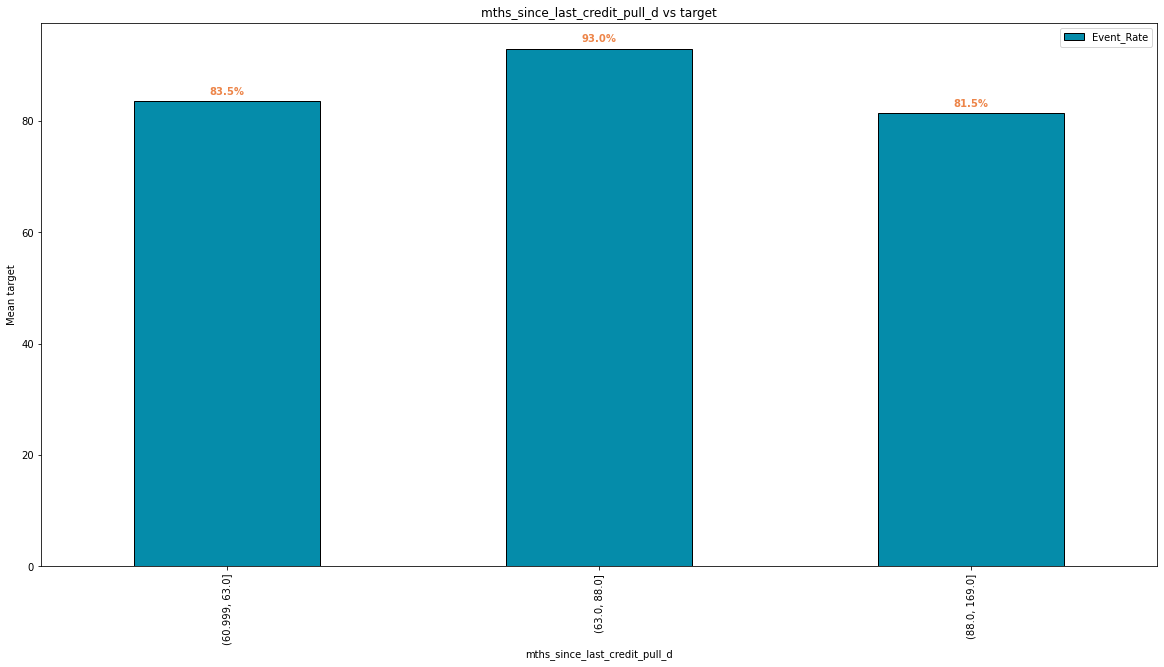

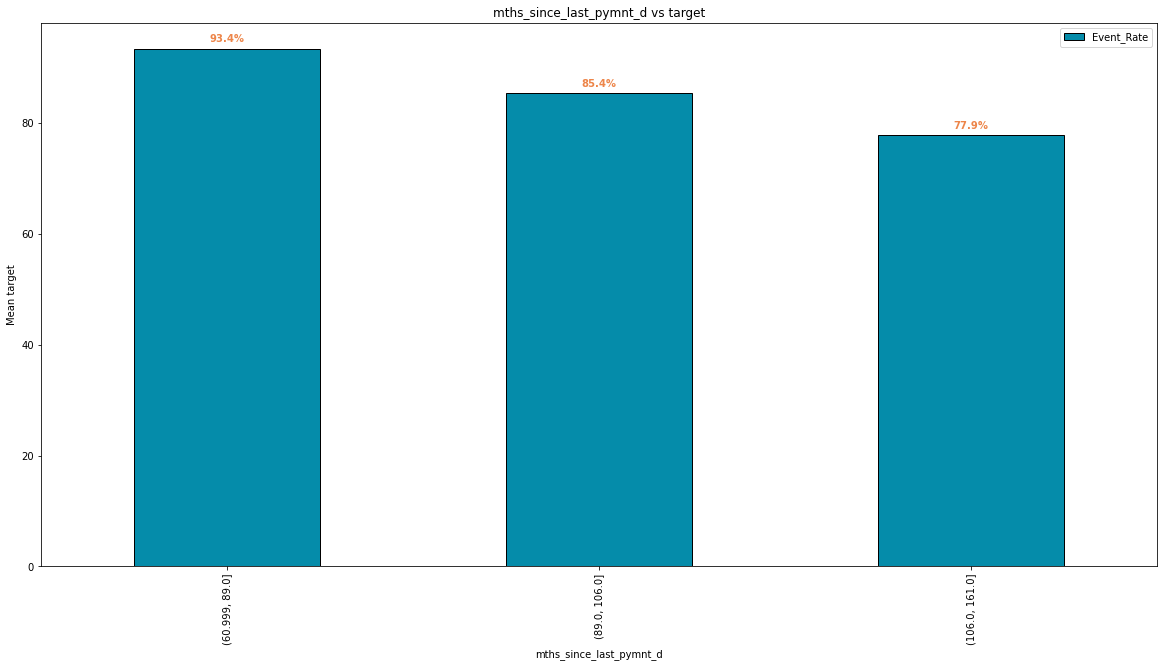

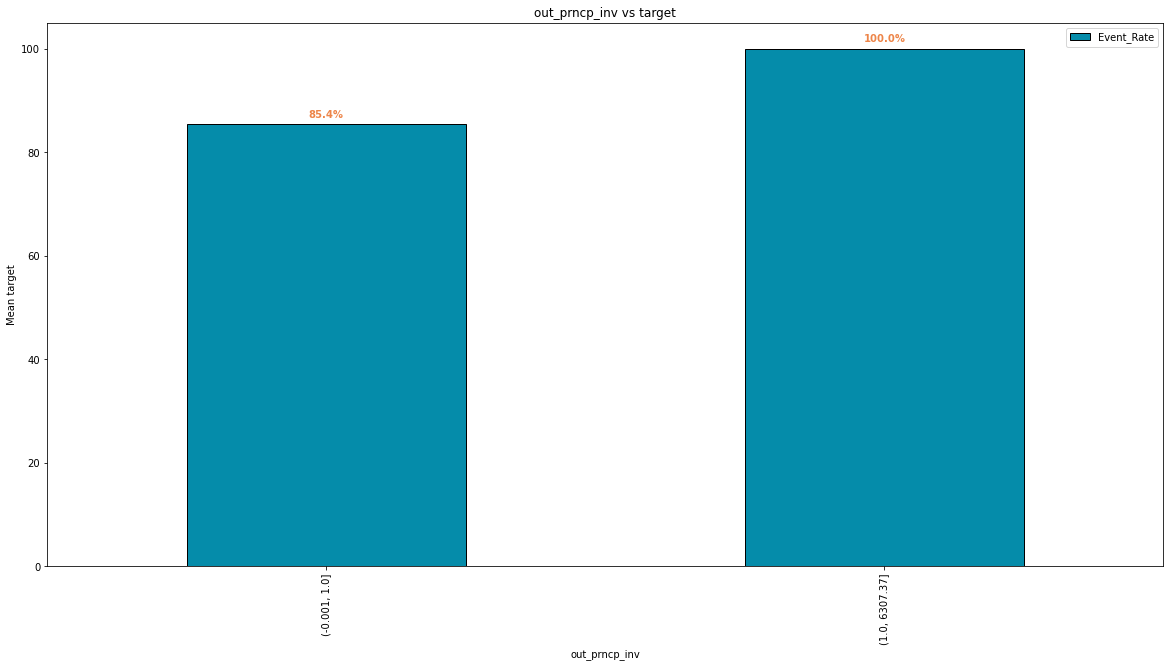

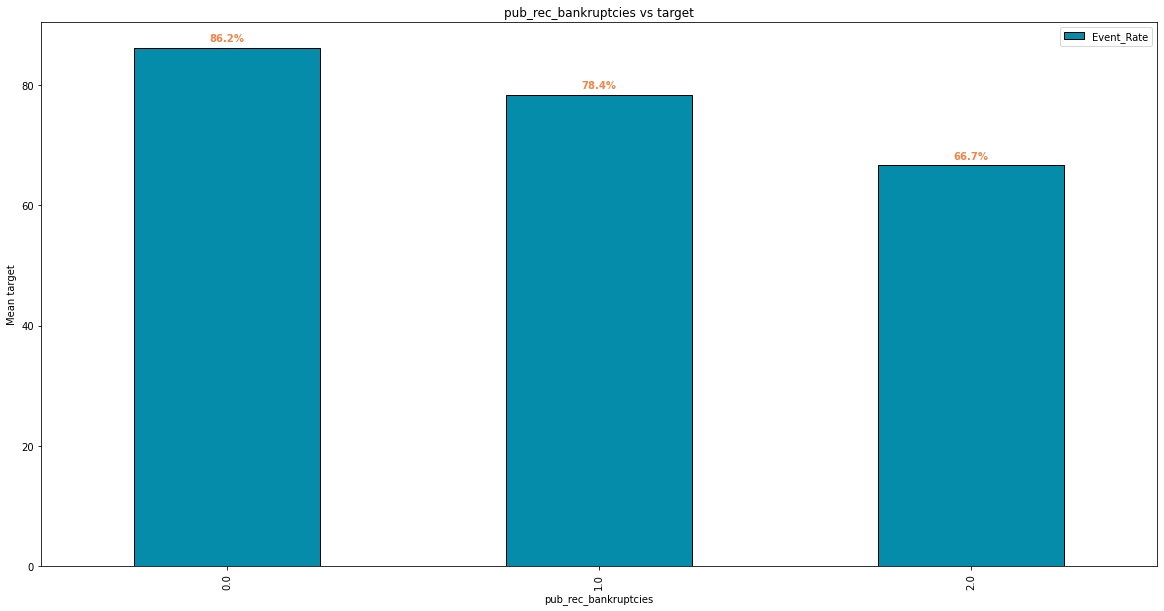

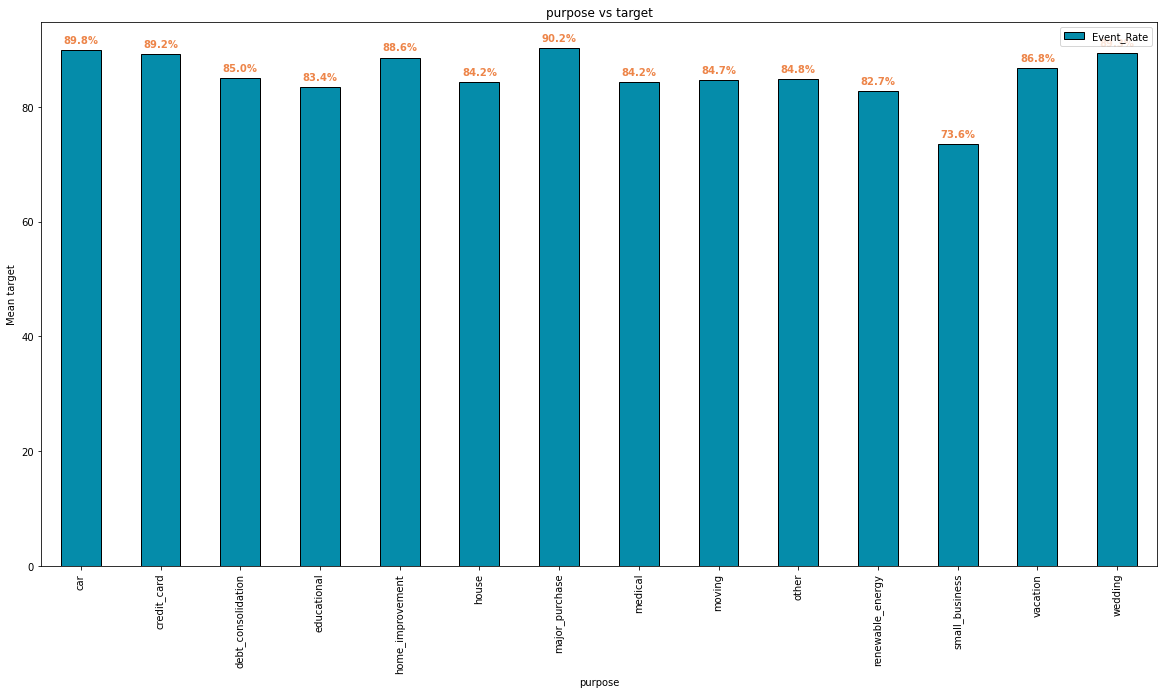

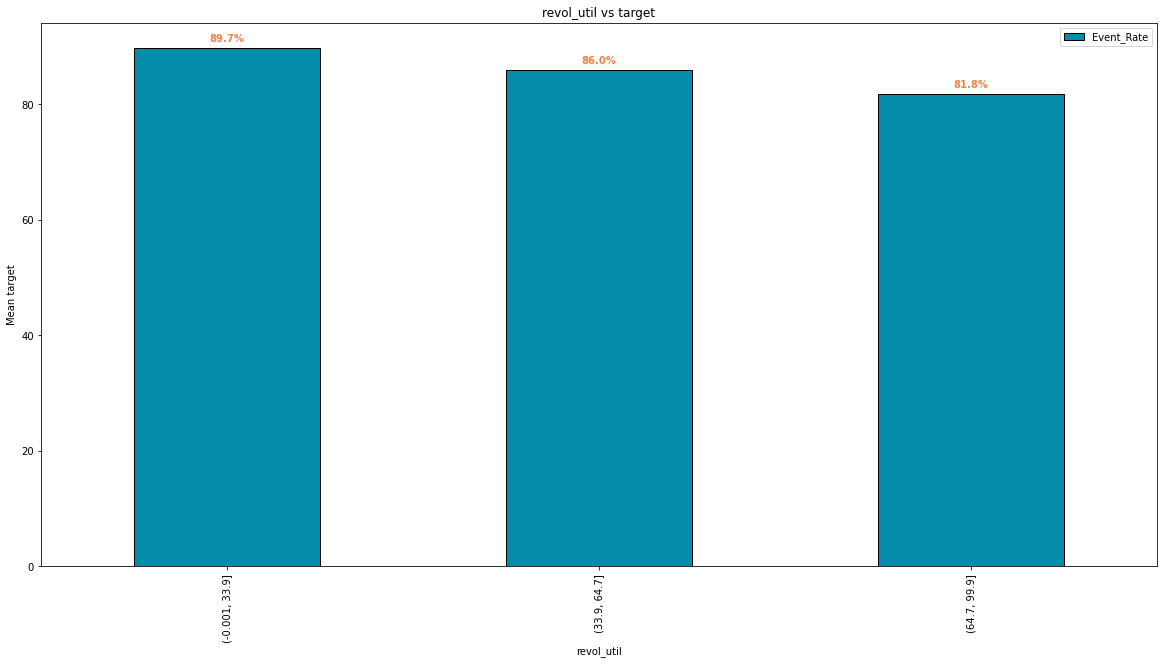

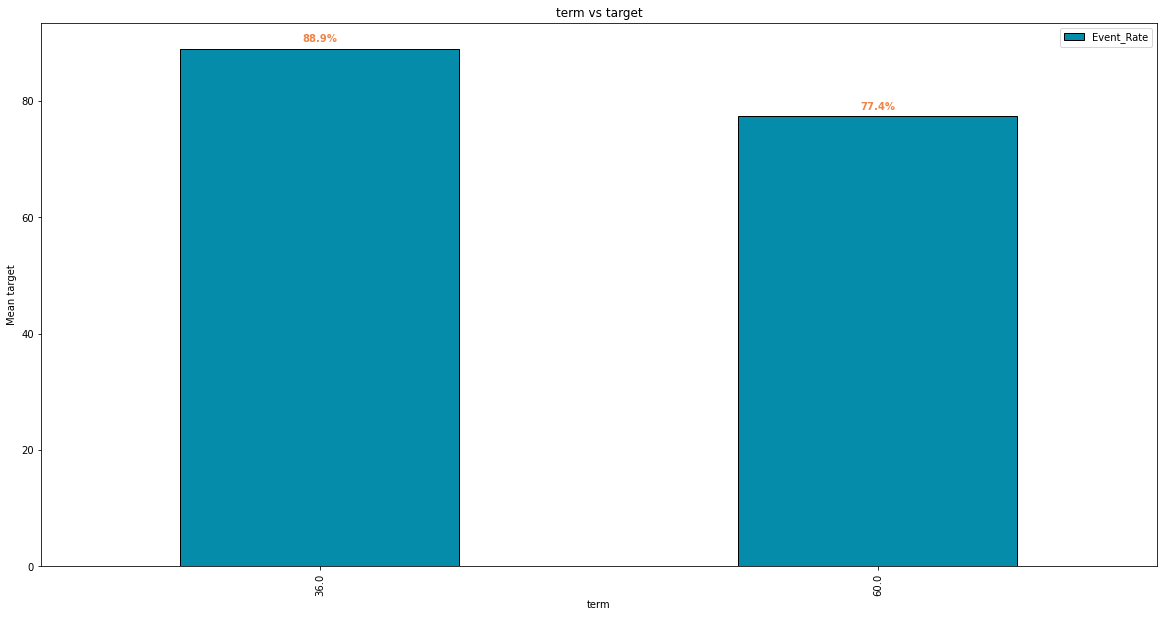

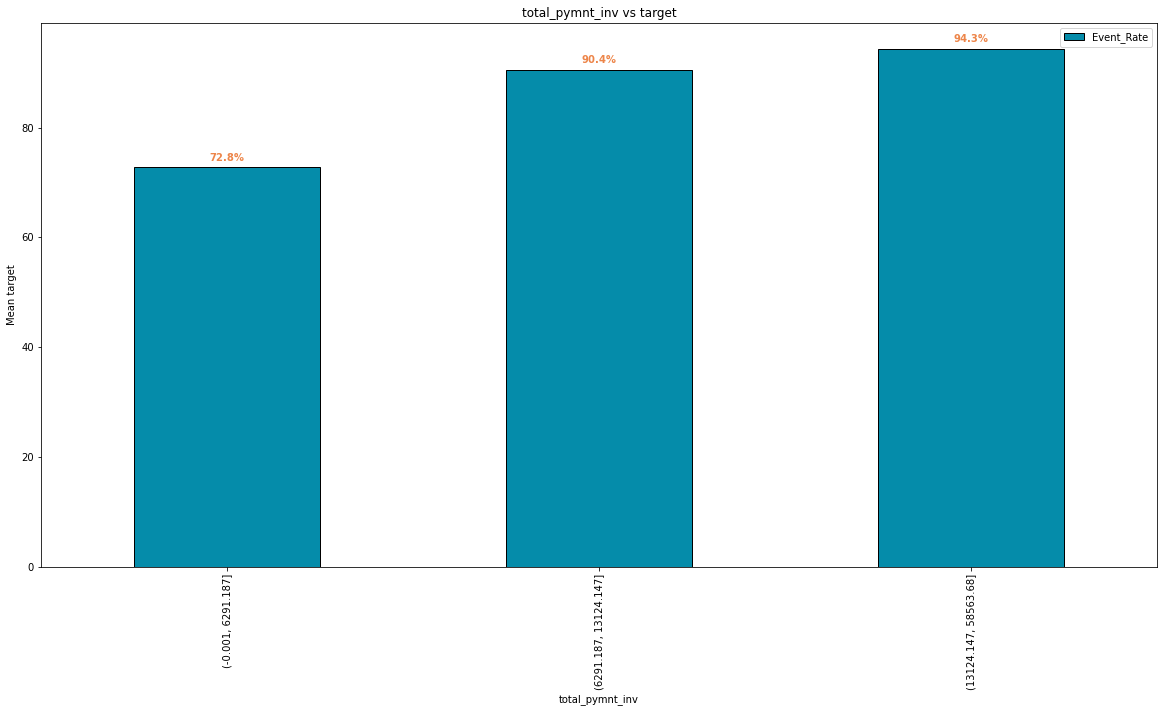

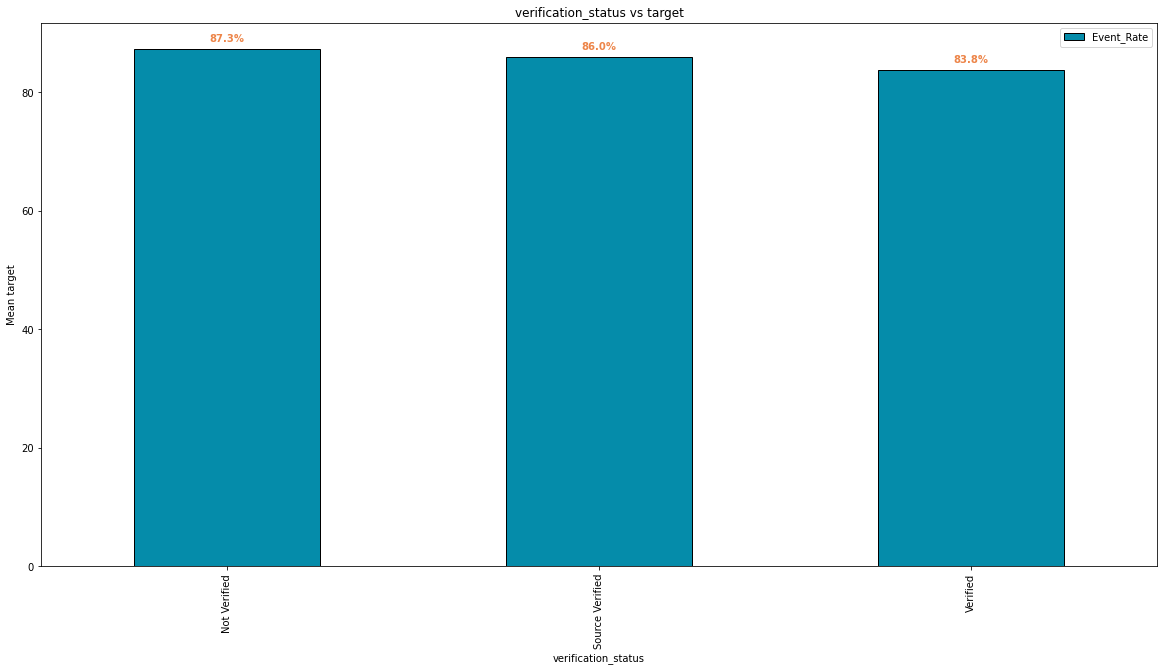

BarCharts(bar_type='v', fig_size=(20, 10))

In [48]:
#Seeing the number of good borrowers per bin in every variable
#target variable is the credit_default column
woe_df = clf.woe_df
bar = BarCharts(bar_type='v',fig_size=(20,10))
bar.plot(woe_df)

In [49]:
#To see if everything is okay before proceeding to machine learning 
print(X_train.shape)
print(X_test.shape)

(31773, 15)
(7944, 15)


## Logistic Regression



In [45]:
#Getting the cross_validated_roc_auc score of the Logistic Regression
logreg = LogisticRegression(max_iter=2000, class_weight = 'balanced')
X_train=clf.transform(X_train)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

scores = cross_val_score(logreg,X_train, y_train, scoring = 'roc_auc', cv = cv).mean()
GINI = scores * 2 - 1


print(f'Mean AUROC:{scores}')
print(f'Gini:{GINI}')

Mean AUROC:0.8248636019573462
Gini:0.6497272039146924


### Transformation of the test data

In [50]:
clf = WOE(woe_bins=output_woe_bins, mono_custom_binning=output_mono_bins,treat_missing='mode')
X_test=clf.transform(X_test)

In [51]:
X_test.head()

,addr_state,annual_inc,grade,home_ownership,inq_last_6mths,int_rate,out_prncp_inv,pub_rec_bankruptcies,purpose,revol_util,term,total_pymnt_inv,verification_status,mths_since_last_credit_pull_d,mths_since_last_pymnt_d
35040,-0.076984,-0.203265,0.206035,0.092182,0.092691,0.024359,-0.0339,0.027037,-0.062982,0.360911,0.282744,-0.819304,-0.160217,-0.179229,-0.541582
25292,-0.129820,-0.017232,-0.197775,-0.078333,0.092691,-0.535161,-0.0339,0.027037,-0.062982,-0.297515,0.282744,0.446343,0.128532,-0.321548,-0.037402
27149,0.073905,-0.203265,-0.474272,0.092182,0.092691,-0.535161,-0.0339,0.027037,-0.062982,0.360911,-0.572447,-0.819304,0.128532,-0.321548,-0.037402
16039,-0.047979,-0.017232,0.206035,-0.078333,0.092691,0.024359,-0.0339,0.027037,-0.062982,0.360911,0.282744,-0.819304,0.128532,0.784409,-0.037402
32385,0.148895,-0.203265,-0.474272,-0.078333,0.092691,-0.535161,-0.0339,0.027037,-0.084798,-0.297515,0.282744,-0.819304,0.128532,-0.179229,-0.541582


In [52]:
#Checking everything is okay before applying testing the data
print(X_train.shape)
print(X_test.shape)

(31773, 15)
(7944, 15)


### Testing data using Logistic Regression

In [53]:
#Getting to know whether an individual will default as well as the probability of default
logreg.fit(X_train, y_train)
y_predict=logreg.predict(X_test)
y_predict_proba=logreg.predict_proba(X_test)
y_predict_proba = y_predict_proba[:][: , 1]

In [54]:
y_test_2 = y_test.copy()
y_test_2.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_2, pd.DataFrame(y_predict_proba)], axis = 1)
# check the shape to make sure the number of rows is same as that in y_test
y_test_proba.shape

(7944, 2)

In [55]:
y_test_proba.columns = ['y_test_class_actual', 'y_predict_proba']
# Makes the index of one dataframe equal to the index of another dataframe.
y_test_proba.index = X_test.index
y_test_proba.head()

,y_test_class_actual,y_predict_proba
35040,1,0.223136
25292,1,0.607779
27149,0,0.098903
16039,1,0.578231
32385,0,0.196393


### Confusion matrix

In [56]:
threshold = 0.5
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_predict_proba'] > threshold, 1, 0)
# create the confusion matrix
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'], normalize = 'all')

array([[0.10460725, 0.03700906],
       [0.21475327, 0.64363041]])

### AUROC

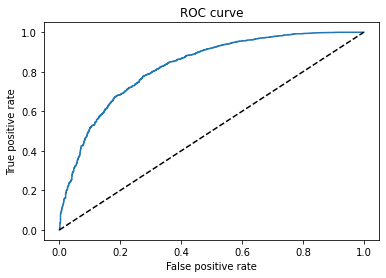

In [57]:
#An ROC curve visualizes all possible thresholds for TPR and FPR
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_predict_proba'])
plt.plot(fpr, tpr)
# plot a secondary diagonal line, with dashed line style and black color to represent a no-skill classifier(random guessing)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [58]:
# Getting the AUROC on our test set
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_predict_proba'])
AUROC

0.8270639878770104

In [59]:
# calculate Gini from AUROC
Gini = AUROC * 2 - 1
Gini

0.6541279757540208

### AUPRC

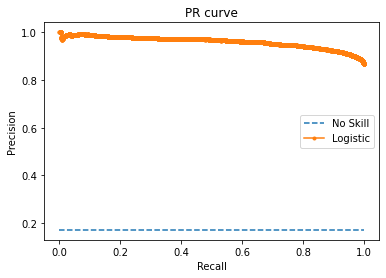

In [60]:
#A PR curve is a function of precision (y-axis) and recall (x-axis)
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_predict_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [61]:
# Getting the AURPRC
auc_pr = auc(recall, precision)
auc_pr

0.96002717035019

An ideal classifier that does not make any prediction errors has an aurprc of 1. Our classifier has an aurprc of 0.96, which is pretty good.